### Name: Prathamesh Rokade
### Class: AIML - C
### Roll No: 57
### Date: 08/10/24
### ML Practical 6

### Aim: Create a machine learning model to predict whether a person suffer from heart attack or not.     
### Perform the EDA
### Apply Naive Bayes classifier
### Apply SVM
### Evaluate the performance using Precision, Recall,F1 score and accuracy.
### Apply hyper parameter tuning to improve performance.

### 1. Perform the EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [3]:
# Display basic statistics of the dataset
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Display the shape of the dataset
data.shape

(303, 14)

In [5]:
# Display the first few rows of the dataset
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Display the last few rows of the dataset
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# Check for duplicates
print("Duplicates:\n", data.duplicated().sum())

Duplicates:
 1


In [9]:
# Handle duplicates
data.drop_duplicates(inplace=True)

In [10]:
# Check for duplicates
print("Duplicates:\n", data.duplicated().sum())

Duplicates:
 0


In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

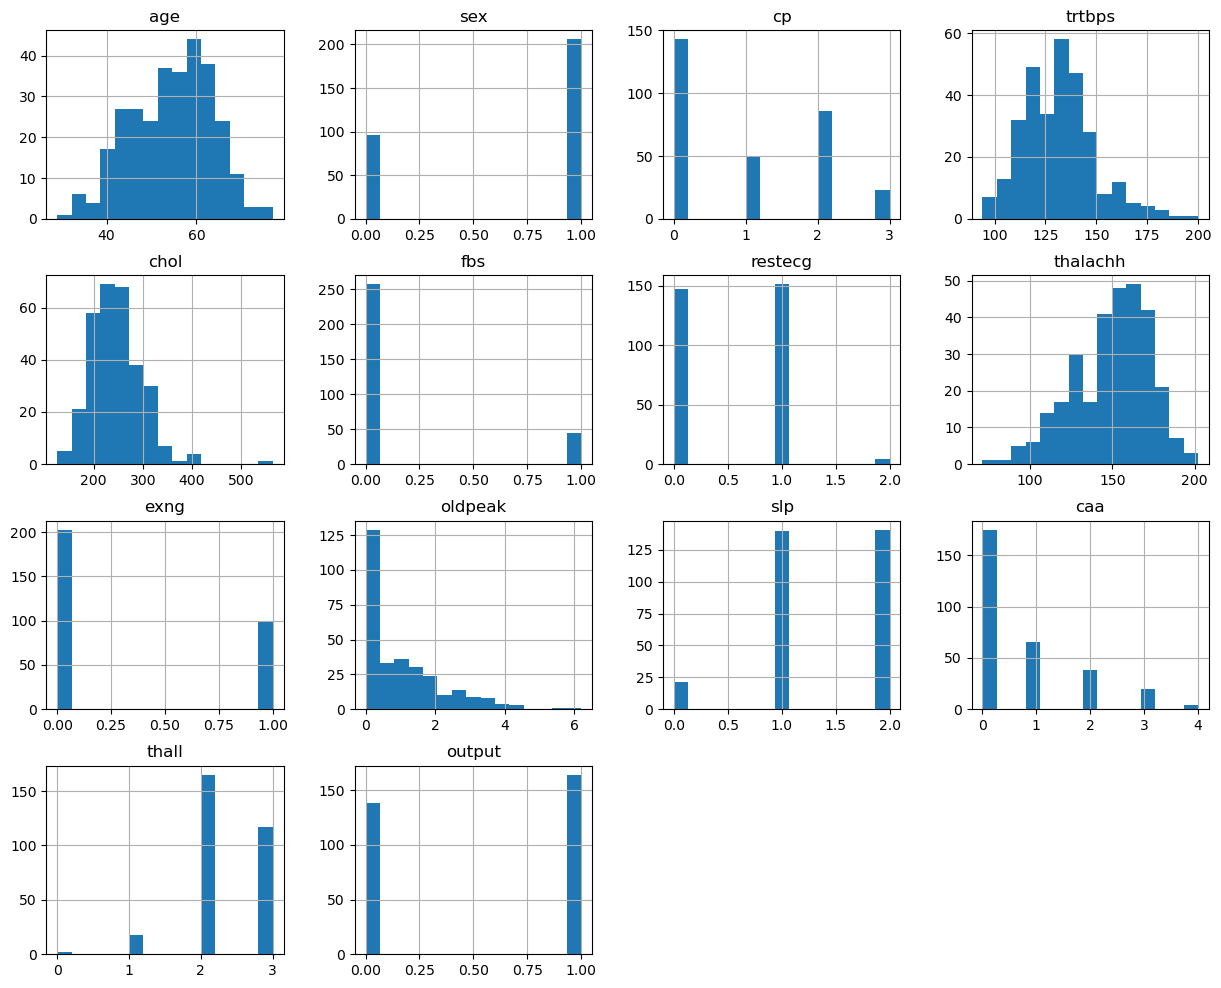

In [12]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

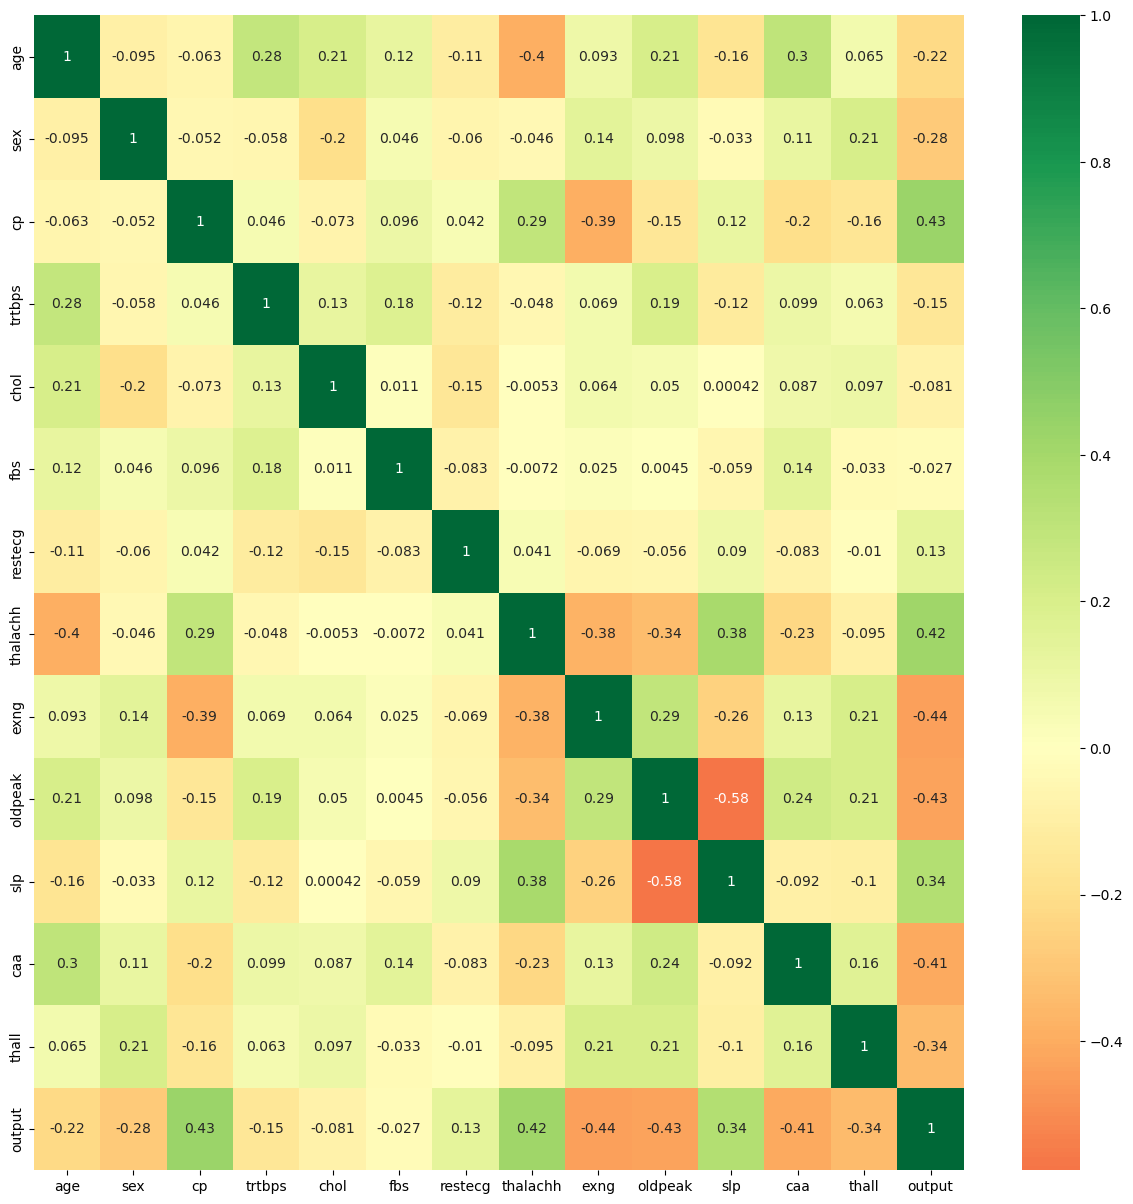

In [13]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

In [14]:
# Separate the features and target
X = data.drop('output', axis=1)  # Features
y = data['output']  # Target (whether an individual defaults)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((241, 13), (61, 13))

### 2. Apply Naive Bayes classifier and Evaluate the performance using Precision, Recall,F1 score and accuracy.

In [16]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [17]:
# Predict using the test set
y_pred_nb = gnb.predict(X_test)

# Evaluate the model performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

In [18]:
print("Accuracy: ",accuracy_nb)
print("Precision: ",precision_nb)
print("Recall: ",recall_nb)
print("F1 Score: ",f1_nb)

Accuracy:  0.8852459016393442
Precision:  0.9310344827586207
Recall:  0.84375
F1 Score:  0.8852459016393444


In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score: 0.8852


In [20]:
y_pred_train = gnb.predict(X_train)

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8174


In [22]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[27  2]
 [ 5 27]]


Text(0.5, 23.52222222222222, 'Predicted label')

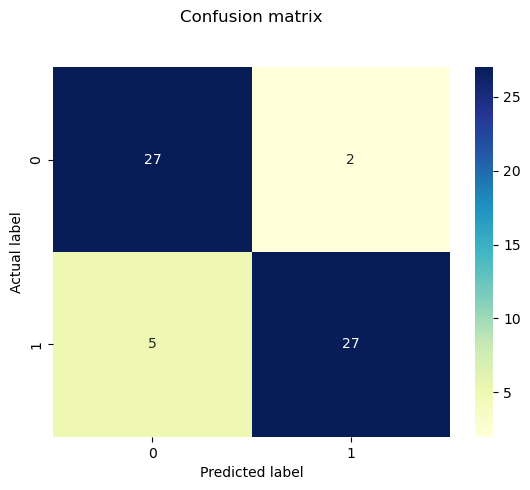

In [24]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3. Apply hyper parameter tuning to improve performance.

In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [26]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [27]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [28]:
gs_NB.best_score_

0.8965811965811966

In [29]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

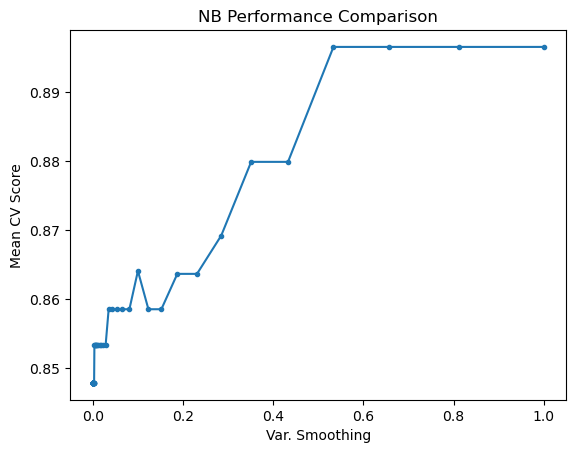

In [30]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [31]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9016393442622951


In [54]:
import pickle
# Save the model to a file
with open('gs_NB.pkl', 'wb') as file:
    pickle.dump(gs_NB, file)

print("Model saved successfully!")

Model saved successfully!


### 4. Apply SVM and Evaluate the performance using Precision, Recall,F1 score and accuracy.

In [32]:
# instantiate the model
svc = SVC() 


# fit the model
svc.fit(X_train, y_train)

SVC()

In [35]:
# Predict using the test set
y_pred_svm = svc.predict(X_test)

# Evaluate the model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [36]:
print("Accuracy: ",accuracy_svm)
print("Precision: ",precision_svm)
print("Recall: ",recall_svm)
print("F1 Score: ",f1_svm)

Accuracy:  0.7049180327868853
Precision:  0.675
Recall:  0.84375
F1 Score:  0.75


In [37]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))

Model accuracy score: 0.7049


In [38]:
y_pred_train = svc.predict(X_train)

In [39]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6515


In [40]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[16 13]
 [ 5 27]]


Text(0.5, 23.52222222222222, 'Predicted label')

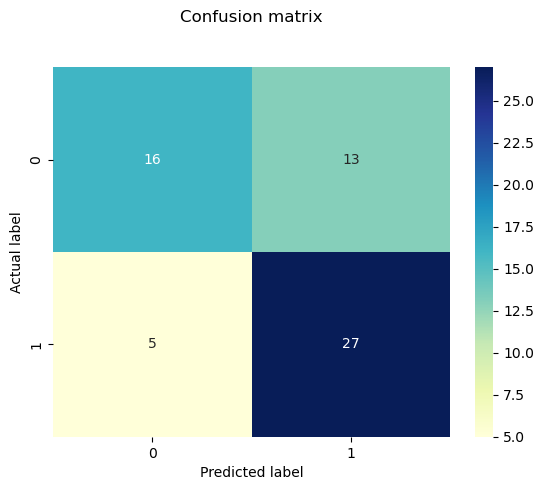

In [42]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 5. Apply hyper parameter tuning to improve performance.

In [45]:
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svc,param_grid)

In [46]:
#Fitting the model
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [48]:
#Calculating the accuracy of tuned model
grid_svc = grid.predict(X_test)
accuracy_score(y_test,grid_svc)

0.819672131147541

In [49]:
print(grid.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [53]:
import pickle
# Save the model to a file
with open('grid_svc.pkl', 'wb') as file:
    pickle.dump(grid_svc, file)

print("Model saved successfully!")

Model saved successfully!
